###
Supermarket sales analysis (EDA using Pandas,SQL,matplotlib,seaborn)
Objective:
The goal of this project is to perform Exploratory Data Analysis (EDA) on a supermarket sales dataset using a combination of SQL queries and Python libraries such as Pandas, Matplotlib, and Seaborn. The analysis aims to uncover key business insights such as customer behavior, revenue trends, and product performance across different branches.

Dataset Overview:
Name: supermarket_sales.csv
Source: Kaggle / Online Retail Dataset
Size: 1000 rows × 17 columns
Description: This dataset records individual customer transactions at a supermarket. It includes details like branch, gender, product line, total cost, gross income, time, payment method, customer type, and rating.

Tools & Technologies Used:
Python (Jupyter Notebook)
Pandas for data manipulation
SQLite + SQLAlchemy for querying the dataset
Matplotlib & Seaborn for visualization
SQL for data aggregation and filtering

Questions answered in the EDA through queries and visualisation:
Which product lines are generating the most income?
Which month did the company make most profit ?
Which branches are performing best in terms of Rating?
What is the average customer type across branches and their gender?
What is the gross profit trend over the different times of the day?
Which gender or customer type spends more?

Summary:
This project demonstrates a complete data analysis pipeline:
Loading and cleaning data
Executing SQL queries directly from Python
Visualizing data with plots and graphs
Extracting actionable business insights
###

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales=pd.read_csv('supermarket.csv')

In [3]:
sales.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
sales.shape

(1000, 17)

In [6]:
sales.describe

<bound method NDFrame.describe of       Invoice ID Branch       City Customer type  Gender  \
0    750-67-8428      A     Yangon        Member  Female   
1    226-31-3081      C  Naypyitaw        Normal  Female   
2    631-41-3108      A     Yangon        Normal    Male   
3    123-19-1176      A     Yangon        Member    Male   
4    373-73-7910      A     Yangon        Normal    Male   
..           ...    ...        ...           ...     ...   
995  233-67-5758      C  Naypyitaw        Normal    Male   
996  303-96-2227      B   Mandalay        Normal  Female   
997  727-02-1313      A     Yangon        Member    Male   
998  347-56-2442      A     Yangon        Normal    Male   
999  849-09-3807      A     Yangon        Member  Female   

               Product line  Unit price  Quantity   Tax 5%      Total  \
0         Health and beauty       74.69         7  26.1415   548.9715   
1    Electronic accessories       15.28         5   3.8200    80.2200   
2        Home and lifestyl

In [7]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [9]:
from sqlalchemy import create_engine
engine = create_engine('sqlite://',echo=False)
sales.to_sql('sales',if_exists='replace',index=False,con=engine)

1000

In [10]:
query="""
SELECT * FROM sales
LIMIT 5;
"""
pd.read_sql(query,engine)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [180]:
query="""
SELECT "Product line",SUM("gross income") AS 'Profit'
FROM SALES
GROUP BY "Product line"
ORDER BY "Product line";
"""
df=pd.read_sql(query,engine)
print(df)

             Product line     Profit
0  Electronic accessories  2587.5015
1     Fashion accessories  2585.9950
2      Food and beverages  2673.5640
3       Health and beauty  2342.5590
4      Home and lifestyle  2564.8530
5       Sports and travel  2624.8965


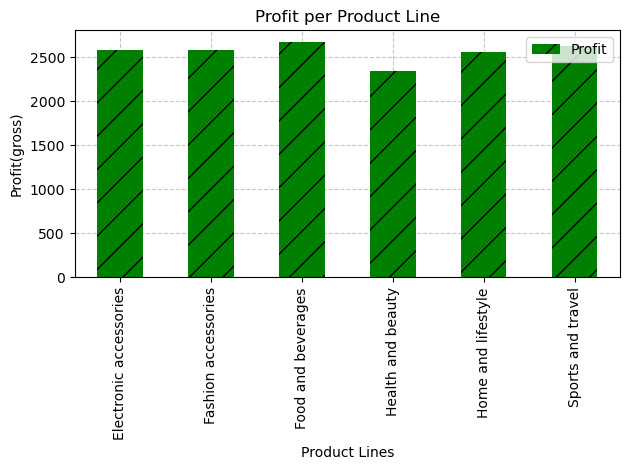

In [181]:
df.plot(kind='bar',x='Product line',y='Profit',color='green',zorder=2,hatch='/')
plt.xlabel('Product Lines')
plt.ylabel('Profit(gross)')
plt.title('Profit per Product Line')
plt.grid(True,zorder=1,alpha=0.7,linestyle='--')
plt.tight_layout()
plt.show()

###
Which product lines are generating the most income?

As per the plotted graph the product line that earns the most gross proit is the food and beverages product line.

In [39]:
sales['Date']=pd.to_datetime(sales['Date'],format='%Y/%m/%d')
sales['Date']=sales['Date'].dt.strftime('%Y-%m-%d')

In [46]:
sales['Date'] = pd.to_datetime(sales['Date'], format='%Y-%m-%d')


In [47]:
print(sales['Date'].dtype)


datetime64[ns]


In [49]:
sales.to_sql('sales', con=engine, index=False, if_exists='replace')


1000

In [50]:
query="""
SELECT * FROM SALES LIMIT 5;
"""
pd.read_sql(query,engine)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05 00:00:00.000000,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08 00:00:00.000000,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03 00:00:00.000000,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27 00:00:00.000000,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08 00:00:00.000000,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [110]:
query="""
SELECT strftime('%m-%Y',Date) AS MONTH,
Sum("gross income") AS PROFIT
FROM Sales
GROUP BY MONTH
ORDER BY MONTH ASC;
"""
dd= pd.read_sql(query,engine)
print(dd)

     MONTH    PROFIT
0  01-2019  5537.708
1  02-2019  4629.494
2  03-2019  5212.167


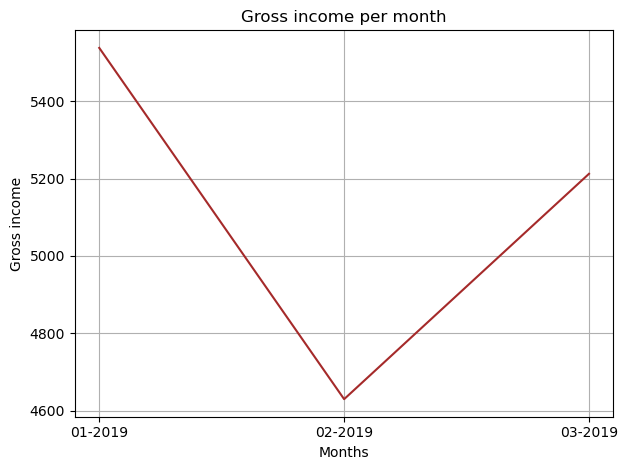

In [111]:
plt.plot(dd.MONTH,dd.PROFIT,color='brown')
plt.title('Gross income per month')
plt.xlabel('Months')
plt.ylabel('Gross income')
plt.grid(True)
plt.tight_layout()
plt.show()

Which month did the company make most profit ?

As per the data available of the 3 months, the company made the most profit in the month of January 

In [112]:
query="""
SELECT BRANCH,AVG(RATING) AS "AVERAGE RATING"
FROM sales
GROUP BY BRANCH
ORDER BY "AVERAGE RATING" DESC;
"""
rating=pd.read_sql(query,engine)
print(rating)

  Branch  AVERAGE RATING
0      C        7.072866
1      A        7.027059
2      B        6.818072


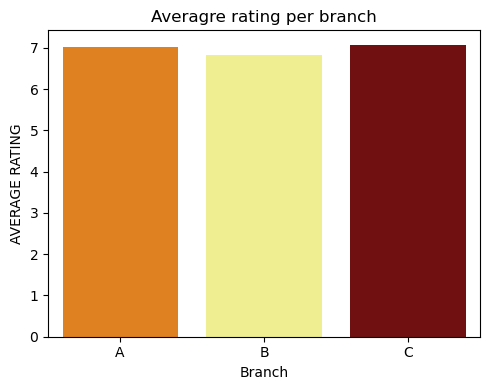

In [105]:
plt.figure(figsize=(5,4))
sns.barplot(x='Branch',y='AVERAGE RATING',data=rating,estimator='median',hue='Branch',palette='afmhot',order=['A','B','C'])
plt.title('Averagre rating per branch')
plt.tight_layout()
plt.show()

Which branches are performing best in terms of Rating?

According to the plot the best rating among the branches is of the Branch C

In [113]:
query="""
SELECT GENDER,"CUSTOMER TYPE",COUNT(*) AS COUNT
FROM sales
GROUP BY GENDER,"CUSTOMER TYPE";
"""
customer=pd.read_sql(query,engine)
print(customer)

   Gender Customer type  COUNT
0  Female        Member    261
1  Female        Normal    240
2    Male        Member    240
3    Male        Normal    259


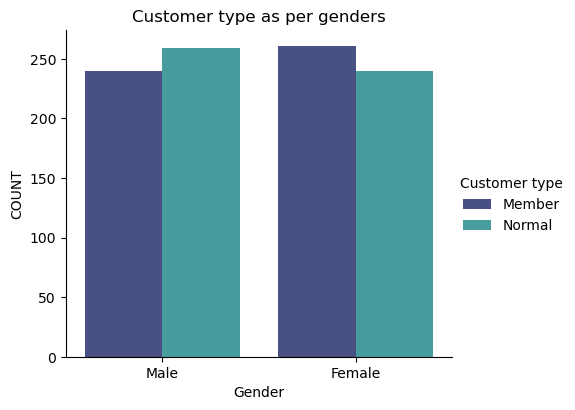

In [132]:
sns.catplot(x='Gender',y='COUNT',data=customer,hue='Customer type',
            kind='bar',
            height=4,
            aspect=1.2,
            palette='mako',
            order=['Male','Female'])
plt.title('Customer type as per genders')
plt.show()

What is the average customer type across branches and their gender?

The plotted graph shows the average customer types with respect to genders as males are 
greater in number as normals in customer type whereas females are generally greater number of members as customer type

In [135]:
query="""
SELECT strftime('%H',Time) AS "HOUR OF THE DAY",SUM("gross income") AS 'PROFIT'
FROM sales
GROUP BY "HOUR OF THE DAY"
ORDER BY "HOUR OF THE DAY" ASC;
"""
hour=pd.read_sql(query,engine)
print(hour)

   HOUR OF THE DAY     PROFIT
0               10  1496.2610
1               11  1446.5395
2               12  1241.2325
3               13  1653.4870
4               14  1468.0190
5               15  1484.7385
6               16  1201.2535
7               17  1164.0580
8               18  1239.5400
9               19  1890.4530
10              20  1093.7870


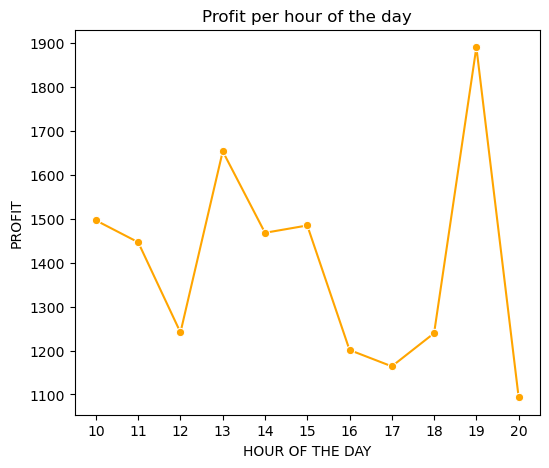

In [157]:
plt.figure(figsize=(6,5))
sns.lineplot(x='HOUR OF THE DAY',y='PROFIT',data=hour,color='orange',marker='o')
plt.title('Profit per hour of the day')
plt.show()

What is the gross profit trend over the different times of the day?

Most profit is made in the 19th hour of the day according to the trend

In [168]:
query="""
SELECT BRANCH,TOTAL,GENDER
FROM sales
"""
sales_per_branch=pd.read_sql(query,engine)
print(sales_per_branch)

    Branch      Total  Gender
0        A   548.9715  Female
1        C    80.2200  Female
2        A   340.5255    Male
3        A   489.0480    Male
4        A   634.3785    Male
..     ...        ...     ...
995      C    42.3675    Male
996      B  1022.4900  Female
997      A    33.4320    Male
998      A    69.1110    Male
999      A   649.2990  Female

[1000 rows x 3 columns]


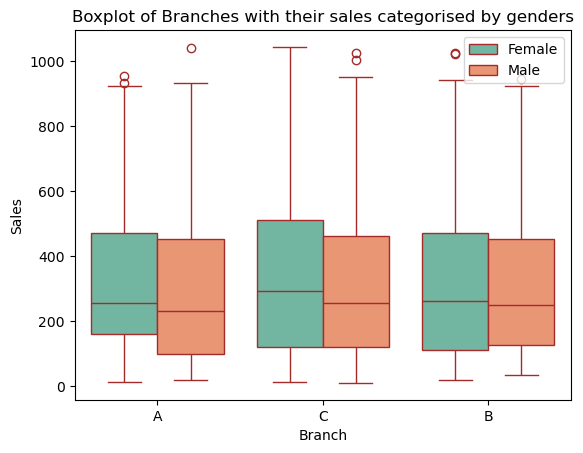

In [179]:
sns.boxplot(x='Branch',y='Total',data=sales_per_branch,hue='Gender',
           palette='Set2',linecolor='brown',linewidth=1,legend=True)
plt.legend(loc=1)
plt.ylabel('Sales')
plt.title('Boxplot of Branches with their sales categorised by genders')
plt.show()

Which gender or customer type spends more?

Generally female customers spend the most in all 3 branches according to the plotted graph

## 📌 Conclusion
- Branch B had the highest overall gross income.
- Customer type and gender did not significantly impact total sales.
- Highest purchases occurred during the weekend in the evening time slot.
- Seaborn and SQL were used together to extract actionable insights.

This project demonstrates end-to-end EDA using Pandas, SQL, Matplotlib, and Seaborn. It can help businesses optimize branch performance and inventory.
